
## RESEARCH PROJECT :  SARCASM DETECTION IN TEXT
### BY JINAL SAPARIYA, SALONI SOMAIYA 









# Abstract 

### Sarcasm is a form of speech act in which speakers convey their message in form of sharply ironical taunt. The intended meaning differs from semantic understanding of the sentence, syntactic and semantic clues doesn’t always help. Automated detection of sarcasm is still in early stages. One reason for lack of computational models has been the difficulty to correctly identify and label sarcastic tweets. The main challenge for these problems is to understand and detect sarcasm as it is important to understand the facts related to an event. .
### Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based on supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in these requires the availability of contextual tweets. However, accuracy and robustness of results are often affected by untruthful sentiments that are of sarcasm nature and this is often left untreated. Past research is mostly focused on either word features or contextual features. In addition, there hasn’t been any substantial work on identifying performance of neural nets as way to estimate sarcasm in text. Current social and political scenario demands a better model to identify influential sections in community with lowest form of wit in twitter sphere. To overcome the limitations related to noise in Twitter datasets, this News Headlines dataset for Sarcasm Detection is collected from two news websites. Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as compared to Twitter datasets. Unlike tweets which are replies to other tweets, the news headlines we obtained are self-contained. This would help us in teasing apart the real sarcastic elements. The main aim of the research conducted in this project is to detect and identify the best classification model to classify the sentences as sarcastic or not. The secondary aim of this project is to find our if Traditional Learning Classifiers outperform neural network classifiers and deep learning networks.

In [0]:
Image (url = 'https://www.peterhaas.org/wp-content/uploads/2015/08/image.jpg')

In [0]:
Image (url = 'https://media.springernature.com/lw785/springer-static/image/chp%3A10.1007%2F978-3-319-53420-6_3/MediaObjects/432514_1_En_3_Fig1_HTML.gif')

### The first step is to import all the packages necessary for the models.

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras import models
from keras import layers
from keras import optimizers
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import json
from os import listdir
from os.path import isfile, join
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.layers import Conv1D, MaxPooling1D, Embedding,LSTM,Dropout
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
from tensorflow.python.client import device_lib
import tensorflow as tf
import re
nltk.download("averaged_perceptron_tagger")
from google.colab import drive
drive.mount('/content/drive')

Using TensorFlow backend.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.listdir("/content/drive/My Drive")

['Sample Pictures',
 'Project_WP',
 'moms backups',
 'DS Mini Project',
 'UACU4051.jpeg',
 'University documents + extra documents',
 'Signatureverfipaper.rtf',
 'Scholarships details .gsheet',
 'Extra Documents',
 'ResumeJinalSapariya.pdf',
 'train.csv',
 'folder.zip',
 'photos',
 'Saved Pictures',
 'Colab Notebooks',
 'Notebook',
 'testnames.csv',
 'resnoet50model.hdf5',
 'Dog_breed_classification.ipynb',
 'inceptionresnoetV2model.hdf5',
 'submission1.csv',
 'inceptionV2model.hdf5',
 'Dog_breed_classification (1).ipynb',
 'Sarcasm_Headlines_Dataset.json',
 'heart.csv',
 'Sarcasm_Headlines_Dataset (1).json',
 'glove.6B',
 'clean.csv']

### Next step is to import our dataset which is in JSON format and store it into a dataframe.

In [0]:
data = pd.read_json('/content/drive/My Drive/Sarcasm_Headlines_Dataset (1).json', lines=True, orient='columns', encoding='utf-8')

In [0]:
#testing whether the runtime is in GPU mode or not
print(device_lib.list_local_devices())

tf.test.gpu_device_name()

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9982608396349235539
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 1033399924588223280
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 8437466851476243964
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14800692839
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4864387662964668139
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


## Data Exploration and Data Cleaning

### Here we observe our data by checking the datatypes of the features

In [0]:
data.info(verbose = True, null_counts = False) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
article_link    object
headline        object
is_sarcastic    int64
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


### **Check for the distribution of the dataset for the reponse variable in order to get the balance of the dataset**

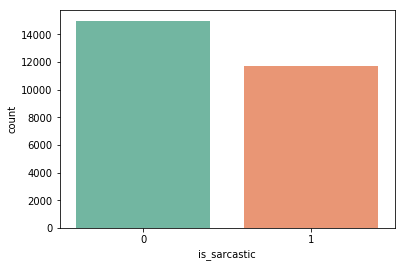

In [0]:
ax = sns.countplot(data['is_sarcastic'],  palette="Set2")

### **Calculating the percentage of the sarcastic and non-sarcastic to get the overview of the labels**

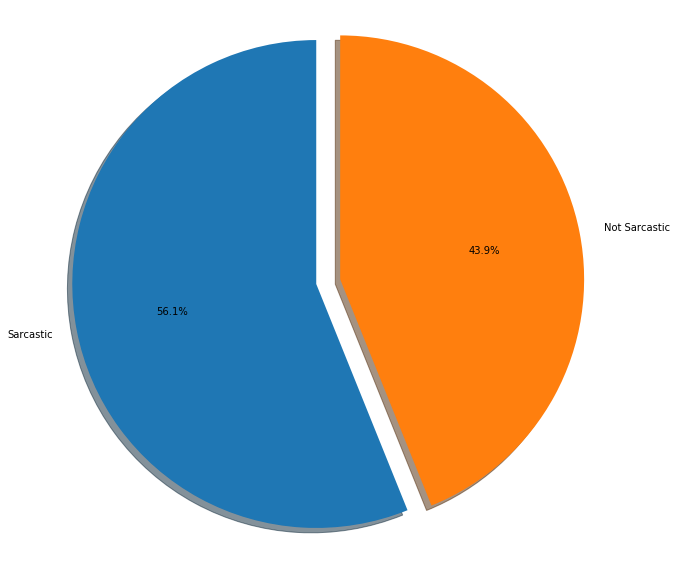

In [0]:
labels = ['Sarcastic', 'Not Sarcastic']

zeros_percent = (data['is_sarcastic'].value_counts()[0]/ data['is_sarcastic'].value_counts().sum())*100
ones_percent = (data['is_sarcastic'].value_counts()[1]/ data['is_sarcastic'].value_counts().sum())*100

sizes = [zeros_percent,ones_percent]
explode = (0, 0.1)
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels, explode = explode, 
        autopct='%1.1f%%', shadow=True, startangle= 90, pctdistance=0.6)
plt.axis('equal')
plt.show()


### **Check for null values into the dataset **

In [0]:
print(data.isnull().sum())

article_link    0
headline        0
is_sarcastic    0
dtype: int64


### Dropping unneccesaary column not helpful for classification.

In [0]:
data = data.drop(['article_link'], axis=1)
data.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


### **Calculate the length of sentences **

In [0]:
data['len'] = data['headline'].apply(lambda x: len(x.split(" ")))
data.head()

,headline,is_sarcastic,len
0,former versace store clerk sues over secret 'b...,0,12
1,the 'roseanne' revival catches up to our thorn...,0,14
2,mom starting to fear son's web series closest ...,1,14
3,"boehner just wants wife to listen, not come up...",1,13
4,j.k. rowling wishes snape happy birthday in th...,0,11


### Displaying the sentence having the maximum length of words.

In [0]:
data['len'].max()

39

In [0]:
pd.options.display.max_colwidth = 300
data[data['len']==39]

,headline,is_sarcastic,len
15247,"elmore leonard, modern prose master, noted for his terse prose style and for writing about things perfectly and succinctly with a remarkable economy of words, unfortunately and sadly expired this gloomy tuesday at the age of 87 years old",1,39


### Visualising the sentences within the length of 20 

In [0]:
for i,headline in enumerate (data['headline'], 1):
    if i > 20:
        break
    else:
        print(i, headline)

1 former versace store clerk sues over secret 'black code' for minority shoppers
2 the 'roseanne' revival catches up to our thorny political mood, for better and worse
3 mom starting to fear son's web series closest thing she will have to grandchild
4 boehner just wants wife to listen, not come up with alternative debt-reduction ideas
5 j.k. rowling wishes snape happy birthday in the most magical way
6 advancing the world's women
7 the fascinating case for eating lab-grown meat
8 this ceo will send your kids to school, if you work for his company
9 top snake handler leaves sinking huckabee campaign
10 friday's morning email: inside trump's presser for the ages
11 airline passengers tackle man who rushes cockpit in bomb threat
12 facebook reportedly working on healthcare features and apps
13 north korea praises trump and urges us voters to reject 'dull hillary'
14 actually, cnn's jeffrey lord has been 'indefensible' for a while
15 barcelona holds huge protest in support of refugees
16 n

### Calculating the frequency of word length and plotting the histogram of it.

In [0]:
data_length = data['len'].value_counts().reset_index()
data_length.rename(columns={'index': 'length_word', 'len':'frequency'}, inplace = True)
data_length.head()

,length_word,frequency
0,10,3484
1,9,3300
2,11,3196
3,8,2857
4,12,2646


<BarContainer object of 32 artists>

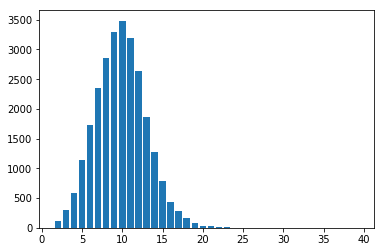

In [0]:
import matplotlib.pyplot as plt
plt.bar(data_length['length_word'], data_length['frequency'])

We observe a normal distribution here and the sentences having length count more than 20 is very less, so we can prune them easily as they will not be needed.

# Data Pre-Processing 

## Text Normalization

### **STEP 1 : Remove Numbers and Punctuations using Regular Expressions**

In [0]:
#sample to check working of re.sub function
mystring = "hello's world"
re.sub('[^A-Za-z ]+', '', mystring)

'hellos world'

In [0]:

#lambda to clean data of punctuation and numbers
def clean_data(x):
  return re.sub('[^A-Za-z ]+', '', x)


data['clean_hd'] = data["headline"].apply(clean_data)

### Saving the cleaned data

In [0]:
data.to_csv("/content/drive/My Drive/clean.csv")

In [0]:
data.head()

,headline,is_sarcastic,len,clean_hd
0,former versace store clerk sues over secret 'black code' for minority shoppers,0,12,former versace store clerk sues over secret black code for minority shoppers
1,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0,14,the roseanne revival catches up to our thorny political mood for better and worse
2,mom starting to fear son's web series closest thing she will have to grandchild,1,14,mom starting to fear sons web series closest thing she will have to grandchild
3,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1,13,boehner just wants wife to listen not come up with alternative debtreduction ideas
4,j.k. rowling wishes snape happy birthday in the most magical way,0,11,jk rowling wishes snape happy birthday in the most magical way


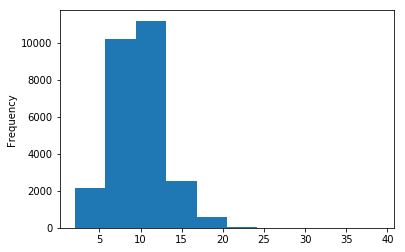

In [0]:
data['len'].plot(kind='hist')
plt.show()

### Removing the headlines whose length is greater than 15 and getting it's shape

In [0]:
# removing those headline whose length is greather than 15
print('shape before preprocessing ',data.shape)
data = data[data['len'] < 20]
print('shape after preprocessing ',data.shape)
data.head()

shape before preprocessing  (26709, 4)
shape after preprocessing  (26606, 4)


,headline,is_sarcastic,len,clean_hd
0,former versace store clerk sues over secret 'black code' for minority shoppers,0,12,former versace store clerk sues over secret black code for minority shoppers
1,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0,14,the roseanne revival catches up to our thorny political mood for better and worse
2,mom starting to fear son's web series closest thing she will have to grandchild,1,14,mom starting to fear sons web series closest thing she will have to grandchild
3,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1,13,boehner just wants wife to listen not come up with alternative debtreduction ideas
4,j.k. rowling wishes snape happy birthday in the most magical way,0,11,jk rowling wishes snape happy birthday in the most magical way


 The Natural Language Toolkit, or more commonly NLTK, is a suite of libraries and programs for symbolic and statistical natural language processing (NLP). Using this we will carry out further pre-processing steps like tokenization and lemmetization.

### Step 2: Tokenization

Tokenization describes the general process of breaking down a text corpus into individual elements that serve as input for various natural language processing algorithms. Usually, tokenization is accompanied by other optional processing steps, such as the removal of stop words and punctuation characters, stemming or lemmatizing, and the construction of n-grams.

In [0]:
# Tokenization process
def tokenize_data(x):
  return x.split(" ")

data["tokens"] = data["clean_hd"].apply(tokenize_data)
data.head()

,headline,is_sarcastic,len,clean_hd,tokens
0,former versace store clerk sues over secret 'black code' for minority shoppers,0,12,former versace store clerk sues over secret black code for minority shoppers,"[former, versace, store, clerk, sues, over, secret, black, code, for, minority, shoppers]"
1,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0,14,the roseanne revival catches up to our thorny political mood for better and worse,"[the, roseanne, revival, catches, up, to, our, thorny, political, mood, for, better, and, worse]"
2,mom starting to fear son's web series closest thing she will have to grandchild,1,14,mom starting to fear sons web series closest thing she will have to grandchild,"[mom, starting, to, fear, sons, web, series, closest, thing, she, will, have, to, grandchild]"
3,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1,13,boehner just wants wife to listen not come up with alternative debtreduction ideas,"[boehner, just, wants, wife, to, listen, not, come, up, with, alternative, debtreduction, ideas]"
4,j.k. rowling wishes snape happy birthday in the most magical way,0,11,jk rowling wishes snape happy birthday in the most magical way,"[jk, rowling, wishes, snape, happy, birthday, in, the, most, magical, way]"


### Step 3: Parts of Speech Tagging

Part-of-speech tagging aims to assign parts of speech to each word of a given text (such as nouns, verbs, adjectives, and others) based on its definition and its context. We collect the tokens and then lemmatize the embeddings based on the parts of speech using NLTK.

Here we use nltk to generate various parts of speech (POS) tags for sarcastic and non-sarcastic sentences and store it in different dataframe

In [0]:

#lambda to POS tag the whole sentence

def calc_pos(x):
  tokens = x.split(" ")
  try:
    tagged_sent = nltk.pos_tag(tokens)
  except:
    tagged_sent = ["Can not Pos"]
  
  return tagged_sent


In [0]:
#seperating out sarcastic and non-sarcastic sentences

data_sar = data[data["is_sarcastic"] == 1]
data_non_sar = data[data["is_sarcastic"]==0]

In [0]:

#applying lambda to generate POS for both frames
data_sar["pos"] = data_sar["clean_hd"].apply(calc_pos)
data_non_sar["pos"] = data_non_sar["clean_hd"].apply(calc_pos)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
data_sar.head()

,headline,is_sarcastic,len,clean_hd,tokens,pos
2,mom starting to fear son's web series closest thing she will have to grandchild,1,14,mom starting to fear sons web series closest thing she will have to grandchild,"[mom, starting, to, fear, sons, web, series, closest, thing, she, will, have, to, grandchild]","[(mom, NN), (starting, VBG), (to, TO), (fear, VB), (sons, NNS), (web, JJ), (series, NN), (closest, JJS), (thing, NN), (she, PRP), (will, MD), (have, VB), (to, TO), (grandchild, VB)]"
3,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1,13,boehner just wants wife to listen not come up with alternative debtreduction ideas,"[boehner, just, wants, wife, to, listen, not, come, up, with, alternative, debtreduction, ideas]","[(boehner, NN), (just, RB), (wants, VBZ), (wife, NN), (to, TO), (listen, VB), (not, RB), (come, VBN), (up, RP), (with, IN), (alternative, JJ), (debtreduction, NN), (ideas, NNS)]"
8,top snake handler leaves sinking huckabee campaign,1,7,top snake handler leaves sinking huckabee campaign,"[top, snake, handler, leaves, sinking, huckabee, campaign]","[(top, JJ), (snake, NN), (handler, NN), (leaves, VBZ), (sinking, VBG), (huckabee, NN), (campaign, NN)]"
15,nuclear bomb detonates during rehearsal for 'spider-man' musical,1,8,nuclear bomb detonates during rehearsal for spiderman musical,"[nuclear, bomb, detonates, during, rehearsal, for, spiderman, musical]","[(nuclear, JJ), (bomb, NN), (detonates, NNS), (during, IN), (rehearsal, NN), (for, IN), (spiderman, JJ), (musical, JJ)]"
16,cosby lawyer asks why accusers didn't come forward to be smeared by legal team years ago,1,16,cosby lawyer asks why accusers didnt come forward to be smeared by legal team years ago,"[cosby, lawyer, asks, why, accusers, didnt, come, forward, to, be, smeared, by, legal, team, years, ago]","[(cosby, NN), (lawyer, NN), (asks, VBZ), (why, WRB), (accusers, NNS), (didnt, VBP), (come, VB), (forward, NN), (to, TO), (be, VB), (smeared, VBN), (by, IN), (legal, JJ), (team, NN), (years, NNS), (ago, RB)]"


### Calculate the total number of each type of POS and observe the distribution over the sentences 

In [0]:
sarc_count ={}
non_sarc_count = {}
def pos_dict(x):
    try:
      pos_dict = dict(x)
    except:
      pos_dict = {}
    for k,v in pos_dict.items():
      if v in sarc_count:
        sarc_count[v]+=1
      else:
        sarc_count[v] = 1
    
    return pos_dict
   
def pos_dict_no_sarc(x):
    try:
      pos_dict = dict(x)
    except:
      pos_dict = {}
    for k,v in pos_dict.items():
      if v in non_sarc_count:
        non_sarc_count[v]+=1
      else:
        non_sarc_count[v] = 1
    
    return pos_dict
    
    
d1 = data_sar["pos"].apply(pos_dict)
d2 = data_non_sar["pos"].apply(pos_dict_no_sarc)

In [0]:
type(data_sar["pos"])

pandas.core.series.Series

In [0]:
data_sar.head()

,headline,is_sarcastic,len,clean_hd,tokens,pos
2,mom starting to fear son's web series closest thing she will have to grandchild,1,14,mom starting to fear sons web series closest thing she will have to grandchild,"[mom, starting, to, fear, sons, web, series, closest, thing, she, will, have, to, grandchild]","[(mom, NN), (starting, VBG), (to, TO), (fear, VB), (sons, NNS), (web, JJ), (series, NN), (closest, JJS), (thing, NN), (she, PRP), (will, MD), (have, VB), (to, TO), (grandchild, VB)]"
3,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1,13,boehner just wants wife to listen not come up with alternative debtreduction ideas,"[boehner, just, wants, wife, to, listen, not, come, up, with, alternative, debtreduction, ideas]","[(boehner, NN), (just, RB), (wants, VBZ), (wife, NN), (to, TO), (listen, VB), (not, RB), (come, VBN), (up, RP), (with, IN), (alternative, JJ), (debtreduction, NN), (ideas, NNS)]"
8,top snake handler leaves sinking huckabee campaign,1,7,top snake handler leaves sinking huckabee campaign,"[top, snake, handler, leaves, sinking, huckabee, campaign]","[(top, JJ), (snake, NN), (handler, NN), (leaves, VBZ), (sinking, VBG), (huckabee, NN), (campaign, NN)]"
15,nuclear bomb detonates during rehearsal for 'spider-man' musical,1,8,nuclear bomb detonates during rehearsal for spiderman musical,"[nuclear, bomb, detonates, during, rehearsal, for, spiderman, musical]","[(nuclear, JJ), (bomb, NN), (detonates, NNS), (during, IN), (rehearsal, NN), (for, IN), (spiderman, JJ), (musical, JJ)]"
16,cosby lawyer asks why accusers didn't come forward to be smeared by legal team years ago,1,16,cosby lawyer asks why accusers didnt come forward to be smeared by legal team years ago,"[cosby, lawyer, asks, why, accusers, didnt, come, forward, to, be, smeared, by, legal, team, years, ago]","[(cosby, NN), (lawyer, NN), (asks, VBZ), (why, WRB), (accusers, NNS), (didnt, VBP), (come, VB), (forward, NN), (to, TO), (be, VB), (smeared, VBN), (by, IN), (legal, JJ), (team, NN), (years, NNS), (ago, RB)]"


### Plotting the parts of speech tags of Sarcastic and non-sarcastic labels

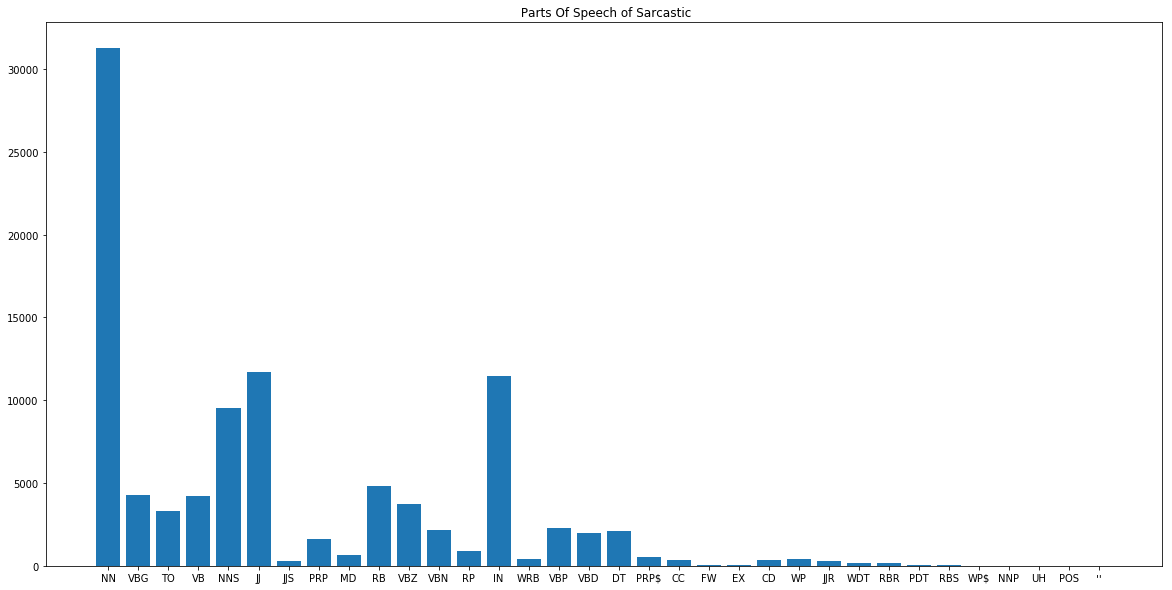

In [0]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
plt.bar(range(len(sarc_count)), list(sarc_count.values()), align='center')
plt.xticks(range(len(sarc_count)), list(sarc_count.keys()))

# plt.bar(*zip(*sarc_count.items()), align = 'center')
plt.title(" Parts Of Speech of Sarcastic")
plt.show()



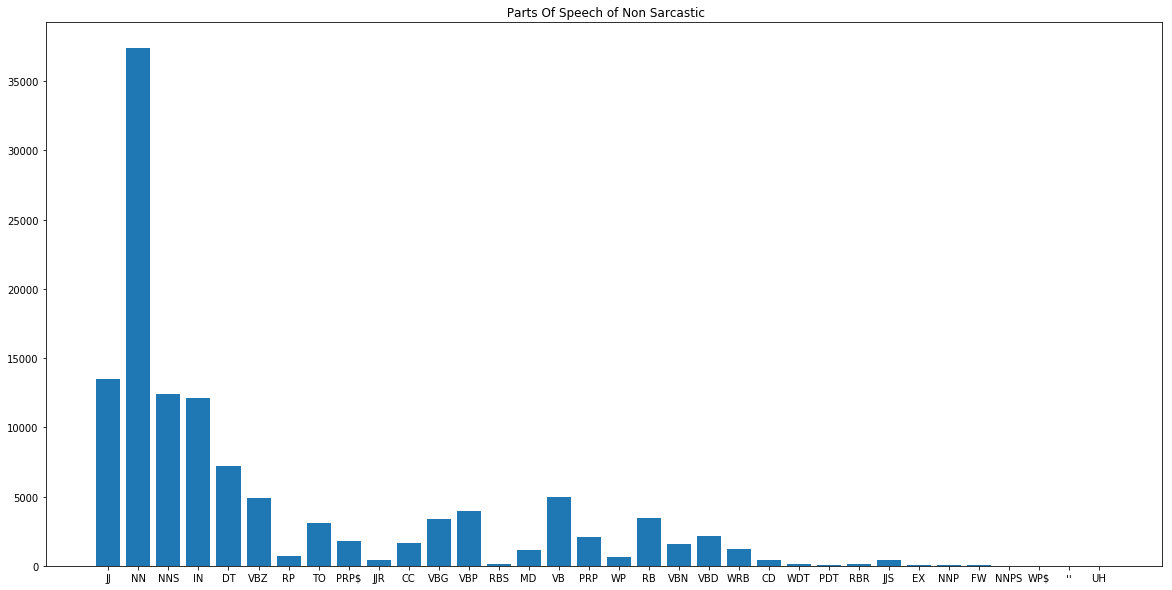

In [0]:
fig = plt.figure(figsize=(20,10))
plt.bar(*zip(*non_sarc_count.items()), align = 'center')
plt.title(" Parts Of Speech of Non Sarcastic")
plt.show()

We observe that most of the sarcastic words are nouns and verbs. They are used frequently and hence we lemmetize them.

### Step 4: Lemmetization

The aim of lemmatization, like stemming, is to reduce inflectional forms to a common base form. As opposed to stemming, lemmatization does not simply chop off inflections. Instead it uses lexical knowledge bases to get the correct base forms of words.

In [0]:

lemm = WordNetLemmatizer()


def lemmat(x):
  try:
    x = x.split(" ")
    temp = []
    for i in x:
      temp.append(lemm.lemmatize(i))
    return temp
  except:
    return ["could not perform op"]

data_sar["lemmatizer"] = data_sar["clean_hd"].apply(lemmat)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [0]:
data_sar.head()

,headline,is_sarcastic,len,clean_hd,tokens,pos,lemmatizer
2,mom starting to fear son's web series closest thing she will have to grandchild,1,14,mom starting to fear sons web series closest thing she will have to grandchild,"[mom, starting, to, fear, sons, web, series, closest, thing, she, will, have, to, grandchild]","[(mom, NN), (starting, VBG), (to, TO), (fear, VB), (sons, NNS), (web, JJ), (series, NN), (closest, JJS), (thing, NN), (she, PRP), (will, MD), (have, VB), (to, TO), (grandchild, VB)]","[mom, starting, to, fear, son, web, series, closest, thing, she, will, have, to, grandchild]"
3,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1,13,boehner just wants wife to listen not come up with alternative debtreduction ideas,"[boehner, just, wants, wife, to, listen, not, come, up, with, alternative, debtreduction, ideas]","[(boehner, NN), (just, RB), (wants, VBZ), (wife, NN), (to, TO), (listen, VB), (not, RB), (come, VBN), (up, RP), (with, IN), (alternative, JJ), (debtreduction, NN), (ideas, NNS)]","[boehner, just, want, wife, to, listen, not, come, up, with, alternative, debtreduction, idea]"
8,top snake handler leaves sinking huckabee campaign,1,7,top snake handler leaves sinking huckabee campaign,"[top, snake, handler, leaves, sinking, huckabee, campaign]","[(top, JJ), (snake, NN), (handler, NN), (leaves, VBZ), (sinking, VBG), (huckabee, NN), (campaign, NN)]","[top, snake, handler, leaf, sinking, huckabee, campaign]"
15,nuclear bomb detonates during rehearsal for 'spider-man' musical,1,8,nuclear bomb detonates during rehearsal for spiderman musical,"[nuclear, bomb, detonates, during, rehearsal, for, spiderman, musical]","[(nuclear, JJ), (bomb, NN), (detonates, NNS), (during, IN), (rehearsal, NN), (for, IN), (spiderman, JJ), (musical, JJ)]","[nuclear, bomb, detonates, during, rehearsal, for, spiderman, musical]"
16,cosby lawyer asks why accusers didn't come forward to be smeared by legal team years ago,1,16,cosby lawyer asks why accusers didnt come forward to be smeared by legal team years ago,"[cosby, lawyer, asks, why, accusers, didnt, come, forward, to, be, smeared, by, legal, team, years, ago]","[(cosby, NN), (lawyer, NN), (asks, VBZ), (why, WRB), (accusers, NNS), (didnt, VBP), (come, VB), (forward, NN), (to, TO), (be, VB), (smeared, VBN), (by, IN), (legal, JJ), (team, NN), (years, NNS), (ago, RB)]","[cosby, lawyer, asks, why, accuser, didnt, come, forward, to, be, smeared, by, legal, team, year, ago]"


### Step 5: Removal of Stop Words

Stop words are the most common words in a language like “the”, “a”, “on”, “is”, “all”. These words do not carry important meaning and are usually removed from texts.

In [0]:
data['headline_new'] = data['headline'].apply(lambda x: re.sub('[^a-zA-Z]','  ',x))

In [0]:
noise_list = nltk.corpus.stopwords.words('english')

In [0]:
data['headline_new'] = data['headline_new'].apply(lambda x: [i for i in x.split() if i not in noise_list])

In [0]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

In [0]:
data['headline_new'] = data['headline_new'].apply(lambda x: [lem.lemmatize(i,'v') for i in x])

In [0]:
data['headline_new'] = data['headline_new'].apply(lambda x: [i.lower() for i in x])

In [0]:
#creating a frame with lemmatized and stopped sentences
#lambda to make lemmatized headlines

def join_lammatize(x):
  return " ".join(x)

data["lemmat"] = data["headline_new"].apply(join_lammatize)

import nltk
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))

#stopper lambda:

def stopper_lambda(x):
 
  words = x.split(" ")
  temp = []
  for word in words:
    if word not in stops:
      temp.append(word)
  return " ".join(temp)


data["stopped"] = data["clean_hd"].apply(stopper_lambda)

In [0]:

#explaination of columns containing training data: 

#headline : raw data
#clean_hd : removed punctuations
#lemmat: lemmatized sentences
#stopped : Removed stopwords
data.head()

,headline,is_sarcastic,len,clean_hd,tokens,headline_new,lemmat,stopped
0,former versace store clerk sues over secret 'black code' for minority shoppers,0,12,former versace store clerk sues over secret black code for minority shoppers,"[former, versace, store, clerk, sues, over, secret, black, code, for, minority, shoppers]","[former, versace, store, clerk, sue, secret, black, code, minority, shoppers]",former versace store clerk sue secret black code minority shoppers,former versace store clerk sues secret black code minority shoppers
1,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0,14,the roseanne revival catches up to our thorny political mood for better and worse,"[the, roseanne, revival, catches, up, to, our, thorny, political, mood, for, better, and, worse]","[roseanne, revival, catch, thorny, political, mood, better, worse]",roseanne revival catch thorny political mood better worse,roseanne revival catches thorny political mood better worse
2,mom starting to fear son's web series closest thing she will have to grandchild,1,14,mom starting to fear sons web series closest thing she will have to grandchild,"[mom, starting, to, fear, sons, web, series, closest, thing, she, will, have, to, grandchild]","[mom, start, fear, son, web, series, closest, thing, grandchild]",mom start fear son web series closest thing grandchild,mom starting fear sons web series closest thing grandchild
3,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1,13,boehner just wants wife to listen not come up with alternative debtreduction ideas,"[boehner, just, wants, wife, to, listen, not, come, up, with, alternative, debtreduction, ideas]","[boehner, want, wife, listen, come, alternative, debt, reduction, ideas]",boehner want wife listen come alternative debt reduction ideas,boehner wants wife listen come alternative debtreduction ideas
4,j.k. rowling wishes snape happy birthday in the most magical way,0,11,jk rowling wishes snape happy birthday in the most magical way,"[jk, rowling, wishes, snape, happy, birthday, in, the, most, magical, way]","[j, k, rowling, wish, snape, happy, birthday, magical, way]",j k rowling wish snape happy birthday magical way,jk rowling wishes snape happy birthday magical way


### Step 6: Generating embeddings using GLOVE

GloVe which stands for global vectors for word representation. It is an unsupervised learning algorithm developed by Stanford for generating word embeddings by aggregating global word-word co-occurrence matrix from a corpus.The training objective of GloVe is to learn word vectors such that their dot product equals the logarithm of the words’ probability of co-occurrence.

In [0]:
from IPython.display import Image
Image (url = 'https://i2.wp.com/mlexplained.com/wp-content/uploads/2018/04/%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%BC%E3%83%B3%E3%82%B7%E3%83%A7%E3%83%83%E3%83%88-2018-04-27-11.52.50.png?resize=598%2C283')

In [0]:
#loading word vectors 
MAX_SEQUENCE_LENGTH = 200
MAX_NUM_WORDS = 30000
EMBEDDING_DIM = 200 
VALIDATION_SPLIT = 0.2 
TEST_SPLIT = 0.2 
embeddings_index = {}
with open("/content/drive/My Drive/glove.6B/glove.6B.200d.txt") as f:
  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    embeddings_index[word] = coefs
print(" Found %s words of vectors" % len(embeddings_index))


 Found 400000 words of vectors


### Checking the shape of training data

In [0]:
Y = pd.get_dummies(data['is_sarcastic']).values
print(Y.shape)

X_train, Y_train, X_test, Y_test = train_test_split(data, Y, test_size = 0.2, random_state=42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(26606, 2)
(21284, 8) (5322, 8)
(21284, 2) (5322, 2)


### Extracting unique tokens from the cleaned dataset and converting and padding sequences to make every sentence similar in length


In [0]:
corpus_selection = "headline" # it can be stopped, headline,lemmat also according to what corpus you want to train on

In [0]:
#based on selection of dataset comment and uncomment

# texts = data["lemmat"]  # lemmatized data
texts = data[corpus_selection] #simple data
# texts = data["headline"] #with punctuation
#texts = data["stopped"] #without stop words

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

seq = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)



Found 29549 unique tokens.


In [0]:
clean_hd = 27539
lemmat = 20057
stopped = 27404
headline = 29549

plot_unique_dict = {"without punctuation":27539, "Lemmatized": 20057, "Stopped" : 27404 , "Raw data": 29549}

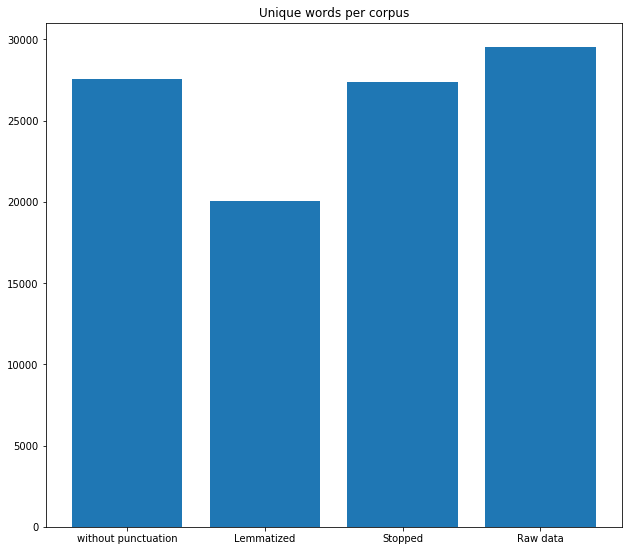

In [0]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))

ax1.set_title("Unique words per corpus")
plt.bar(range(len(plot_unique_dict)), list(plot_unique_dict.values()), align='center')
plt.xticksc), list(plot_unique_dict.keys()))
plt.show()

### Generating the sequence of the vectors

In [0]:
seq

array([[    0,     0,     0, ...,     5,  2564,  8387],
       [    0,     0,     0, ...,   262,     8,  1014],
       [    0,     0,     0, ...,    45,     1, 10688],
       ...,
       [    0,     0,     0, ..., 10687,     8,    65],
       [    0,     0,     0, ...,  1717,  3779,  3540],
       [    0,     0,     0, ...,     3, 29549,   819]], dtype=int32)

## Model selection

In [0]:
from sklearn.model_selection  import train_test_split
from keras.callbacks import LearningRateScheduler
from keras.layers import Input,Dense,Dropout,GlobalMaxPooling1D
import keras
from keras.models import Model

### We create the embedding matrix which consists of unique tokens and vectors generated by Glove.

In [0]:
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)
        

print(embedding_matrix.shape)

(29550, 200)


### Training the model by spliting the data into test(20%) and train(80%)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(seq, data["is_sarcastic"], test_size=0.20, random_state=42)

### Defining a  callback custom function to plot the training and validation accuracy and losses

A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training. You can pass a list of callbacks (as the keyword argument callbacks) to the .fit() method of the Sequential or  Model classes. The relevant methods of the callbacks will then be called at each stage of the training.

In [0]:
from keras.callbacks import Callback

class PlotLearning(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning

In [0]:
#adding a custom learning rate decay function
def step_decay(epoch):
    initial_lrate = 0.05
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return 0.0005**epoch

# prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector


lr = LearningRateScheduler(step_decay, verbose=1)


embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

print('Training model.')

# train a 1D convnet with global maxpooling



Training model.


## Model 1 - LSTM/RNN

Recurrent Neural Networks with different architectures has one thing in common which is the embedding layer at the beginning and then various configurations of Long Short Term Memory (LSTM) and dense layers to crack down this classification problem. The idea behind RNNs is to make use of sequential information. RNNs are called recurrent because they perform the same task for every element of a sequence, with the output depended on previous computations.


Now that we have prepared our training data we need to transform it so that it is suitable for use with Keras.

First we must transform the list of input sequences into the form expected by an LSTM network.

In [0]:

from IPython.display import Image
Image (url = "https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/The_LSTM_cell.png/1200px-The_LSTM_cell.png")

In [0]:
Image ( url = 'https://acadgild.com/blog/wp-content/uploads/2018/02/Recurrent-Neural-Network.jpg')



```
# This is formatted as code
```

## RNN Computation
So how do these things work?

They accept an input vector x and give an output vector y. However, crucially this output vector’s contents are influenced not only by the input you just fed in, but also on the entire history of inputs you’ve fed in in the past. 

In [0]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

embedded_sequences = keras.layers.SpatialDropout1D(0.3)(embedded_sequences)
x = LSTM(200,return_sequences=False)(embedded_sequences)
# x = Conv1D(200, 5, activation='relu')(x)
# x = Dense(1024,activation = "relu")(x)
# x = Dropout(0.2)(x)
x = Dense(512,activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(256,activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(128,activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(64,activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(32,activation="relu")(x)
x = Dropout(0.2)(x)
preds = Dense(1, activation='sigmoid')(x)

model = Model(sequence_input, preds)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])




Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 200, 200)          5910000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 200, 200)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               102912    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
__________

Instructions for updating:
Use tf.cast instead.
Train on 21284 samples, validate on 5322 samples
Epoch 1/10
21284/21284 [==============================] - 221s 10ms/step - loss: 0.5527 - acc: 0.7231 - val_loss: 0.4219 - val_acc: 0.8006


<Figure size 432x288 with 0 Axes>

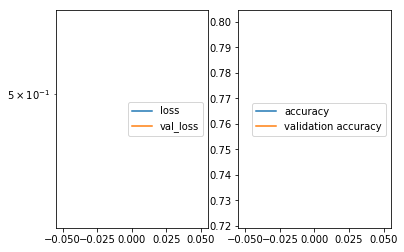

Epoch 2/10
21284/21284 [==============================] - 222s 10ms/step - loss: 0.4065 - acc: 0.8204 - val_loss: 0.3453 - val_acc: 0.8439


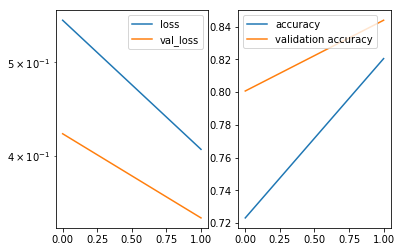

Epoch 3/10
21284/21284 [==============================] - 230s 11ms/step - loss: 0.4249 - acc: 0.8180 - val_loss: 0.4415 - val_acc: 0.7982


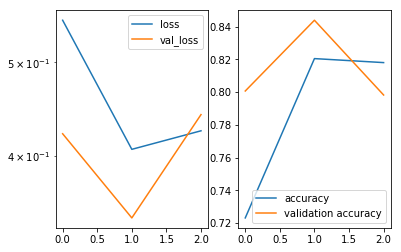

Epoch 4/10
21284/21284 [==============================] - 240s 11ms/step - loss: 0.3487 - acc: 0.8512 - val_loss: 0.3223 - val_acc: 0.8583


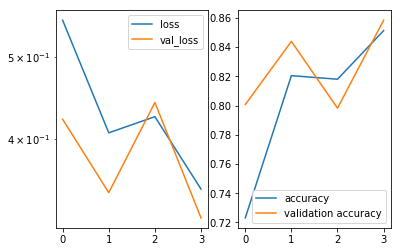

Epoch 5/10
21284/21284 [==============================] - 238s 11ms/step - loss: 0.3173 - acc: 0.8667 - val_loss: 0.3329 - val_acc: 0.8574


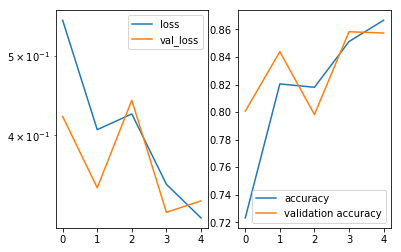

Epoch 6/10
21284/21284 [==============================] - 240s 11ms/step - loss: 0.2835 - acc: 0.8833 - val_loss: 0.3217 - val_acc: 0.8668


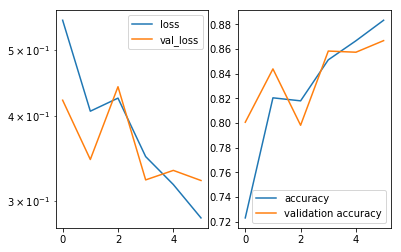

Epoch 7/10
21284/21284 [==============================] - 238s 11ms/step - loss: 0.2514 - acc: 0.8958 - val_loss: 0.3082 - val_acc: 0.8745


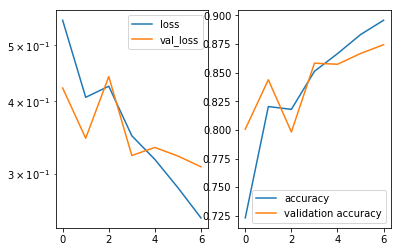

Epoch 8/10
21284/21284 [==============================] - 237s 11ms/step - loss: 0.2302 - acc: 0.9043 - val_loss: 0.3109 - val_acc: 0.8756


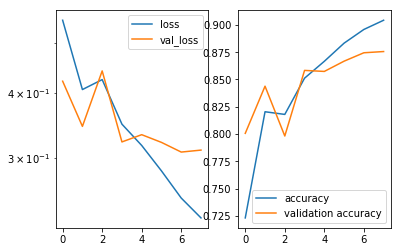

Epoch 9/10
21284/21284 [==============================] - 237s 11ms/step - loss: 0.1989 - acc: 0.9192 - val_loss: 0.3210 - val_acc: 0.8784


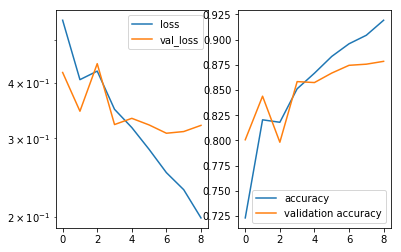

Epoch 10/10
21284/21284 [==============================] - 237s 11ms/step - loss: 0.1819 - acc: 0.9276 - val_loss: 0.3549 - val_acc: 0.8719


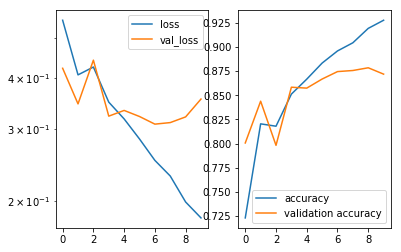

In [0]:
history=model.fit(X_train, y_train,
          batch_size=32,
          epochs=10,
            validation_data=(X_test, y_test),callbacks=[PlotLearning()])

In [0]:
rnn_score = model.evaluate(X_test,y_test)

5322/5322 [==============================] - 21s 4ms/step


In [0]:
rnn_score

[0.35486180441400156, 0.8718526869821889]

## Model 2 : Naive Bayes Classifier

Naive Bayes classifiers are linear classifiers that are known for being simple yet very efficient. The probabilistic model of naive Bayes classifiers is based on Bayes’ theorem, and the adjective naive comes from the assumption that the features in a dataset are mutually independent. In practice, the independence assumption is often violated, but naive Bayes classifiers still tend to perform very well under this unrealistic assumption. 

In [0]:

from IPython.display import Image
Image (url='https://provalisresearch.com/uploads/linear_vs_nonlinear_problems.png')

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics


In [0]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[corpus_selection],data['is_sarcastic'],random_state=33)

#Train and evaluate the model
vect = CountVectorizer().fit(X_train)
#vectorize sentences
X_train_vectorized = vect.transform(X_train)

#create and fit a multinomial naive bayes
clfrNB = MultinomialNB(alpha = 0.5)


clfrNB.fit(X_train_vectorized, y_train)


preds = clfrNB.predict(vect.transform(X_test))

naive_score = clfrNB.score(vect.transform(X_test),y_test)

score = roc_auc_score(y_test, preds)
print(metrics.classification_report(y_test,preds))
print(score)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      3778
           1       0.83      0.80      0.82      2874

   micro avg       0.84      0.84      0.84      6652
   macro avg       0.84      0.84      0.84      6652
weighted avg       0.84      0.84      0.84      6652

0.8383265309580832


Naive Bayes Classifier gives the accuracy of 84%

## Model 3: Random Forest Classifier

Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero-in on the classification. The multiple trees allow for a probabilistic classification: a majority vote among estimators gives an estimate of the probability.

In [0]:
rfc =  RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0)
rfc.fit(X_train_vectorized,y_train)
preds = rfc.predict(vect.transform(X_test))

In [0]:
Image (url = 'https://www.researchgate.net/profile/Erika_Amstalden_van_Hove/publication/228540194/figure/fig1/AS:301839783350274@1448975620988/The-Random-Forest-classifier-is-an-ensemble-of-decision-trees-where-the-single-trees-are.png')

In [0]:
print(metrics.classification_report(y_test,preds))
random_fo_score = rfc.score(vect.transform(X_test),y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.57      1.00      0.72      3778
           1       0.00      0.00      0.00      2874

   micro avg       0.57      0.57      0.57      6652
   macro avg       0.28      0.50      0.36      6652
weighted avg       0.32      0.57      0.41      6652



With Random Forest Classifier we notice from the report that it classifies the labels with accuracy of only 56% which is very less as compared to previous model.

## Model 4: Linear Support Vector Classifier

The task requires a text dataset that has sentences to be classified and labels for that sentences. The amount of data for this task can only be estimated once the model building phase starts. It has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples. C is the penalty parameter and it is set to 1 because the accuracy somehow increases, and the kernel is set to linear, the other kernels (poly and rbf) are either too slow or innacurate. 

In [0]:
Image (url= 'https://www.researchgate.net/publication/315316855/figure/fig1/AS:473082948263936@1489803172664/A-linear-support-vector-machine.png')

In [0]:
svc_l1 = LinearSVC(dual= False)
svc_l2 = LinearSVC(penalty="l1",dual=False)

In [0]:
svc_l1.fit(X_train_vectorized,y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [0]:
svc_l2.fit(X_train_vectorized,y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

In [0]:
svc_l1_score = svc_l1.score(vect.transform(X_test),y_test)

In [0]:
svc_l2_score = svc_l2.score(vect.transform(X_test),y_test)

With linear support vector classifier we get accuracy score of 82% 

## Model 5: Logistic Regression

In [0]:
lgr = LogisticRegression(random_state=0)

In [0]:
lgr.fit(X_train_vectorized,y_train)
y_pred = lgr.predict(vect.transform(X_test))


logistic_score = lgr.score(vect.transform(X_test),y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      3778
           1       0.82      0.81      0.82      2874

   micro avg       0.84      0.84      0.84      6652
   macro avg       0.84      0.84      0.84      6652
weighted avg       0.84      0.84      0.84      6652



With logistic regression we are able to classify the labels with 85% accuracy

## Evaluation of models

In [0]:
result_dict = {"Logistic regression":logistic_score,"Linear SVC with L1":svc_l1_score,"Linear SVC with L2":svc_l2_score,"Multinomial NB":naive_score,
                  "Random Forest":random_fo_score,"RNN":rnn_score[1]}

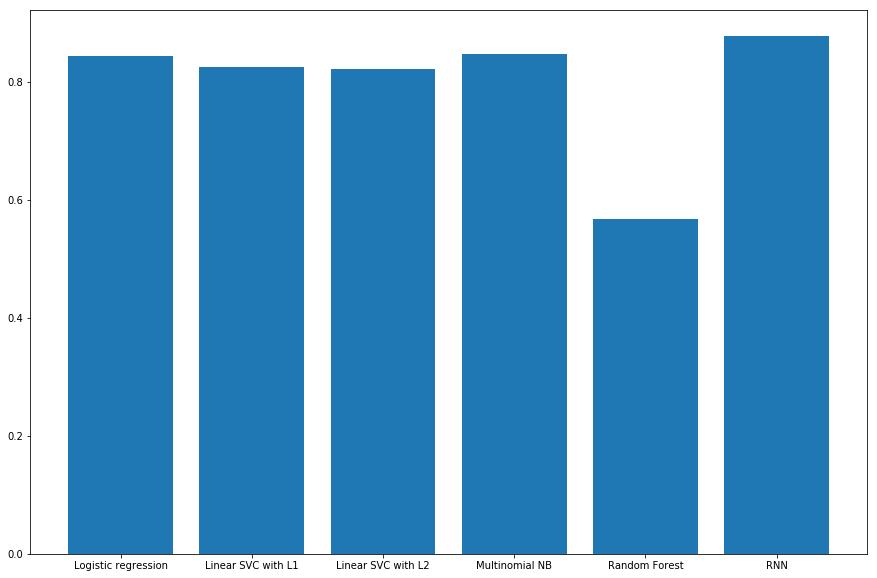

In [0]:
fig = plt.figure(figsize=(15,10))

plt.bar(range(len(result_dict)), list(result_dict.values()), align='center')
plt.xticks(range(len(result_dict)), list(result_dict.keys()))
plt.show()

## Conclusion

In this project we performed classification on labels to be sarcastic or non-sarcastic using various models. After cleaning and exploration of data we could analyze what pre-processing needs to be done on it. We noticed that the dataset did not contain much of noisy data. We performed various steps in text normalization like removal of punctuations, stop words, digits, tokenization, stemming and lemmetization using parts of speech. We fitted the pre-processed data into different models and trained them using deep learning networks. From evaluation of models we conclude that LSTM/RNN model gave us better accuracy of 86% to correctly classify the labels into sarcastic and non-sarcastic sentences. The poorer results obtained using random forest classifier were not completely expected. We expect to see that some sort of contextual clues to play a big role in sarcastic nature of a sentence. The other classifier's performances were average, this could possibly be due to the small size of the dataset which in turn leads to the model overfitting the data.

## Scope

For this project we have been working for a long time right from topic selection to doing research about it. We had to do a lot of reading as it's our first project that is dealing with text classification. We read a lot of published papers and blogs for deep learning neural networks. According to our study, sarcasm detection majorly deals with sentiment analysis based on contextual words. Text classification here is challenging due to lack of intonation and facial expressions. We therefore decide to deal with this problem using various methods like LSTM/RNN, SVM, Naive Bayes Classifier and Random Forest Classifier.  We trained various models and by analyzing the strengths and weaknesses of the baseline model, we strived to develop one that will achieve better results. Since we used scikit learn, keras and tensorflow we had to read documentations on it and understand the hyperparameter tuning needed for the best model and accuracy. We divided our work equally from research work till the implementation of the project. For two people this project was appropriate and efficient enough in the given time frame. Finding of dataset, cleaning it, exploration of data , pre-processing of data , logistic regression was done by Saloni and the next half of the project which includes other models was done by Jinal. The accuracy of this model deals with how well the data is pre-processed and how well we choose the parameters for training.  Our goal was to get a decent accuracy score and make our model capable to classify the sarcastic and non-sarcastic labels. We tried our best to do as much research as possible and implement our knowledge at its best. 

The papers we referred for our research work:

[1] https://nlp.stanford.edu/seminar/details/pbhattacharyya.pdf

[2] https://www.aclweb.org/anthology/C18-1156

[3] https://aclweb.org/anthology/C16-1231

## Future Work

If given more time we would like to train our embeddings based on strictly news corpus as well as train our own embeddings on given corpus to compare and contrast our models. We would also like to experiment with Gated Recurrent Unit based neural networks. We would also like to see how convolutional layers would behave in the scope of this network. Also train the model more by increasing the epochs & decreasing the batch size. We would also like to work on with more sarcastic sentences from Reddit and other sources and analyze which model can perform better for classification.

## Contribution

OWN: 80%

SOURCE : 20%

## License


Copyright 2019 SALONI SOMAIYA , JINAL SAPARIYA

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## References


[1] https://www.kaggle.com/

[2] https://towardsdatascience.com/recurrent-neural-networks-the-powerhouse-of-language-modeling-d45acc50444f/

[3] https://machinelearningmastery.com/what-are-word-embeddings/

[4] http://colah.github.io/posts/2015-08-Understanding-LSTMs/

[5] https://www.datacamp.com/community/tutorials/deep-learning-python
 
[6] https://github.com/tensorflow/models

[7] https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/



In [0]:
Image (url = 'https://cdn-images-1.medium.com/max/1200/1*NDfK-DV3cvCwz1Y5IxQQxg.png')